# The Power of Elon Musk

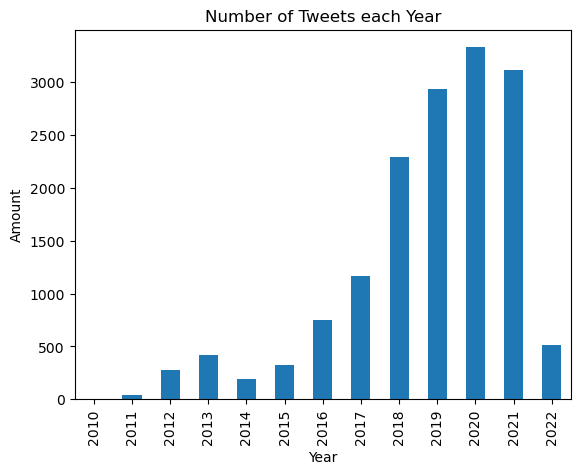

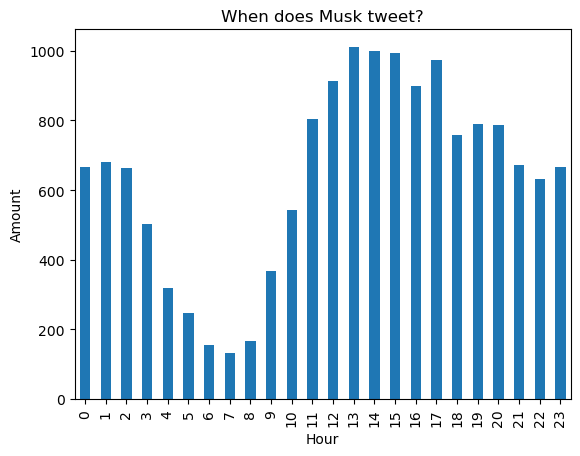

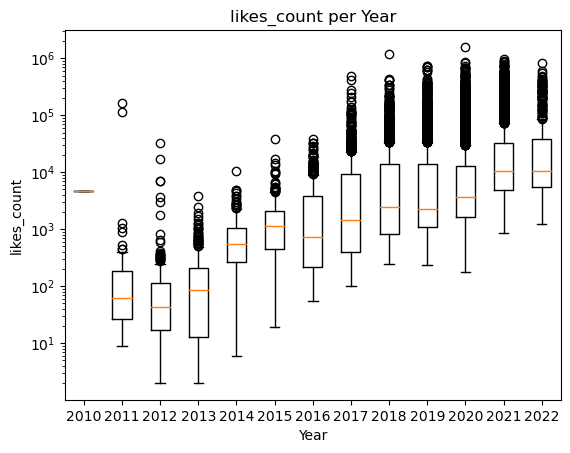

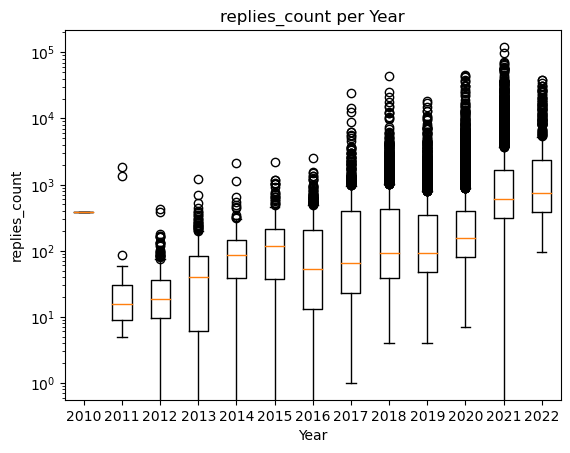

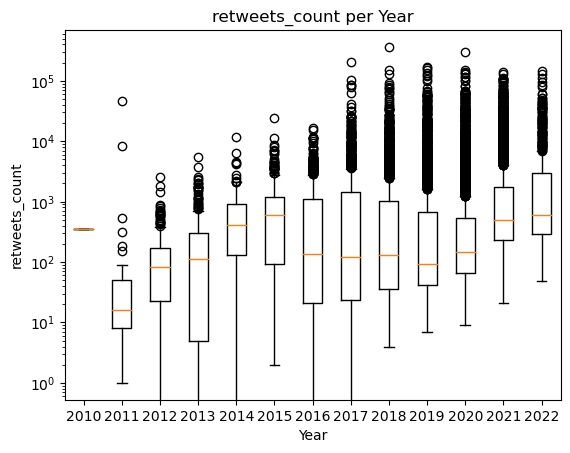

In [5]:
# Read data from CSV files
import os
from main import read_tweets
from bg_analysis import background_analysis
from sentiment import sentimentAnalysis
tweets_df = read_tweets()
os.makedirs(os.path.dirname('./fig/'), exist_ok=True)
background_analysis(tweets_df)
tweets_df = sentimentAnalysis(tweets_df)

In [88]:
import pandas as pd
#pie chart for Tweet Sentiment
infl_tweets_id = [1408246196603346947, 1340573003579617280, 1215526980449255424, 1340588909974200321, 1054520588734058496, 1386821144037236737, 1420529868404518913, 1461942451053252612, 1538406040374595585, 1377567762919292938, 1198751258384818176, 1347165127036977153, 270972990756364288, 1421203369058787332, 1421152540394143746, 1354174279894642703, 1354018055014260738, 1055585815718322178, 1055882299756109824, 1055993647995412481, 1162061693809094657, 1498858611241635843]
infl_tweets_df = pd.DataFrame()
for tweet in infl_tweets_id:
    row = tweets_df.loc[tweets_df['id'] == tweet]
    infl_tweets_df = pd.concat([row,infl_tweets_df.loc[:]]).reset_index(drop=True)

print(infl_tweets_df)



        # print(tweets_df.loc[tweets_df['id'] == 1343608530998153222])
sentiment_sum = 0
count = 0
positive_sentiment = 0
negative_sentiment = 0
neutral_sentiment = 0 
sentiment = []
for x in infl_tweets_df.loc[:,'tweet_sentiment']:
    print(x)
    if x == 0:
        neutral_sentiment += 1 
        sentiment.append('neutral')
    if x>0:
        positive_sentiment += 1
        sentiment.append('positive')
    if x<0:
        negative_sentiment += 1
        sentiment.append('negative')
    count += 1
    sentiment_sum += x 
infl_tweets_df['sentiment'] = sentiment 
print(negative_sentiment,"negative sentiment tweets")
print(positive_sentiment,"positive sentiment tweets")
print(neutral_sentiment, "neutral sentiment tweets")
avg_sentiment = sentiment_sum/count
if avg_sentiment == 0:
    print("average sentiment is neutral", avg_sentiment)
if avg_sentiment>0:
    print("average sentiment is positive", avg_sentiment)
if avg_sentiment<0:
    # negative_sentiment += 1
    print("average sentiment is negative", avg_sentiment)

                     id      conversation_id  \
0   1498858611241635843  1498848735798960130   
1   1162061693809094657  1161834318588608512   
2   1055993647995412481  1055990004738977793   
3   1055882299756109824  1055882134387335168   
4   1055585815718322178  1055517521082609664   
5   1354018055014260738  1353830512557780993   
6   1354174279894642703  1354174279894642703   
7   1421152540394143746  1421152540394143746   
8   1421203369058787332  1421191181162094596   
9    270972990756364288   270972990756364288   
10  1347165127036977153  1347165127036977153   
11  1198751258384818176  1198751258384818176   
12  1377567762919292938  1377567762919292938   
13  1461942451053252612  1461809183205036035   
14  1420529868404518913  1420267443436462082   
15  1386821144037236737  1386797551794499592   
16  1054520588734058496  1054501056229588992   
17  1340588909974200321  1340588909974200321   
18  1215526980449255424  1215526980449255424   
19  1340573003579617280  134057300357961

2


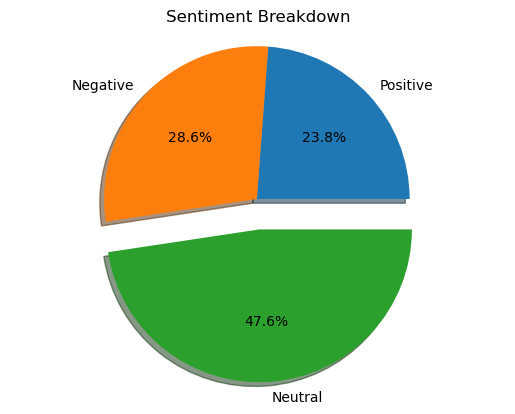

In [89]:
import matplotlib.pyplot as plt
import numpy as np
#pie chart 
y = np.array([positive_sentiment, negative_sentiment, neutral_sentiment])
max_sentiment = np.argmax(y, axis = 0)
print(max_sentiment)
mylabels = ["Positive", "Negative", "Neutral"]
myexplode = [0, 0, 0]
myexplode[max_sentiment] = 0.2

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sentiment Breakdown')
plt.show()

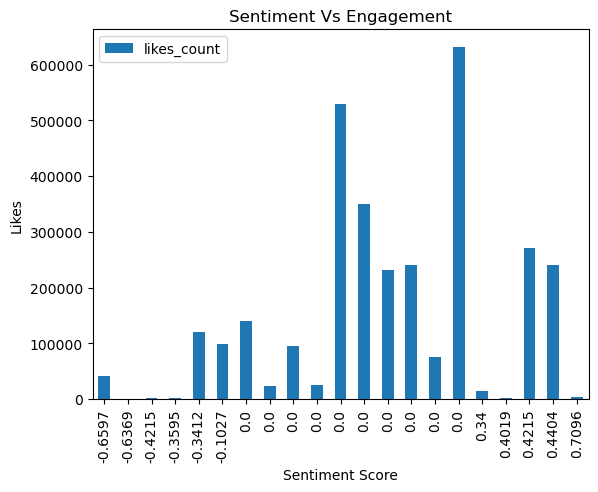

In [90]:
#tweet sentiment vs engagement 
infl_tweets_df = infl_tweets_df.sort_values(by="tweet_sentiment")
infl_tweets_df.plot(x="tweet_sentiment", y="likes_count", kind = "bar")
plt.xlabel('Sentiment Score')
plt.ylabel('Likes')
plt.title('Sentiment Vs Engagement')
plt.show()     


/Users/saudalsulaiman/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


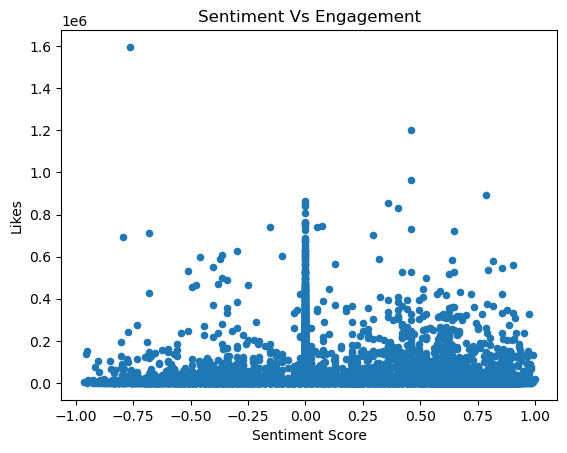

In [119]:
scatter = tweets_df.plot.scatter(x='tweet_sentiment',
                    y='likes_count',
                    colormap='viridis')
plt.xlabel('Sentiment Score')
plt.ylabel('Likes')
plt.title('Sentiment Vs Engagement')
plt.show() 

[44043.833333333336, 234056.1, 106721.6]


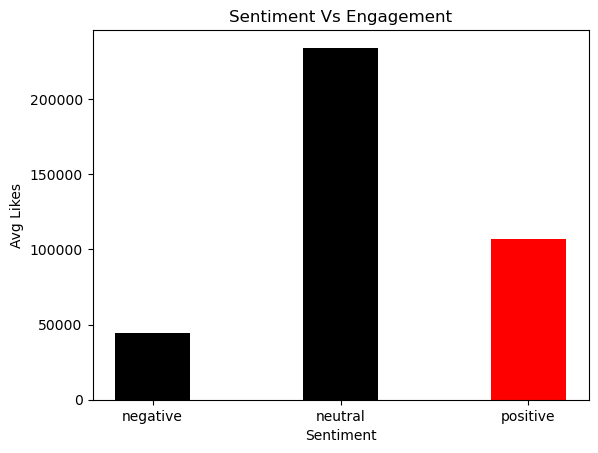

In [91]:
#tweet sentiment vs stock_price change
#avg engagement for a positive tweet, neutral tweet, negative tweet
grp=infl_tweets_df.groupby('sentiment')
sent_list = ['negative', 'neutral', 'positive']
avg_likes = []
grp.get_group('negative')
for i in sent_list:
    temp = grp.get_group(i)['likes_count']
    temp = np.array(temp)
    avg_likes.append(np.mean(temp))
    
print(avg_likes)

y = np.array(avg_likes)
mylabels = sent_list
plt.bar(mylabels, avg_likes , color =['black', 'black', 'red'], width = 0.4)
 
plt.xlabel("Sentiment")
plt.ylabel("Avg Likes")
plt.title("Sentiment Vs Engagement")
plt.show()



In [71]:
# infl_tweets_df.at[17,'sentiment']='negative'
df2 = infl_tweets_df[['tweet', 'sentiment']].copy()


In [92]:
id = [1408246196603346947, 1340573003579617280
,1215526980449255424,
1340588909974200321,
1054520588734058496,
1386821144037236737,
1420529868404518913,
1461942451053252612,
1377567762919292938,
270972990756364288,
1421203369058787332,
1421152540394143746,
1354174279894642703,
1198751258384818176,
1055585815718322178,
1055882299756109824,
1055993647995412481,
1162061693809094657,
1498858611241635843]
vol = [0.02,
0.05,
0.07,
0.05,
-0.02,
-0.09,
0.1,
-0.03,
0.73,
0.03,
0.00,
0.00,
0.09,
0.16,
0.3,
0.13,
0.13,
-0.04,
0.03]
for i in range(len(id)):
        row = infl_tweets_df['id'] == id[i]
        infl_tweets_df.loc[row, 'volume_correlation'] = vol[i]


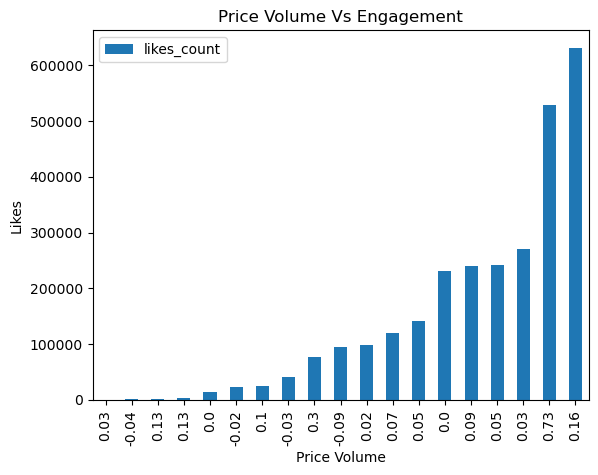

In [93]:
vol_df = infl_tweets_df.dropna(subset=['volume_correlation'])
#plot price volume vs sentiment
vol_df = vol_df.sort_values(by="likes_count")
vol_df.plot(x="volume_correlation", y="likes_count", kind = "bar")
plt.xlabel('Price Volume')
plt.ylabel('Likes')
plt.title('Price Volume Vs Engagement')
plt.show() 

In [125]:
vol_stock = infl_tweets_df[['tweet', 'likes_count', 'volume_correlation', 'price_correlation', 'tweet_sentiment']].copy()
vol_stocks = vol_stock.iloc[[18, 3, 2, 17, 14, 20, 13, 12, 16, 1, 11, 15]]
vol_crypto = vol_stock.iloc[[10, 0, 9, 8, 7, 6, 4, 19, 5]]

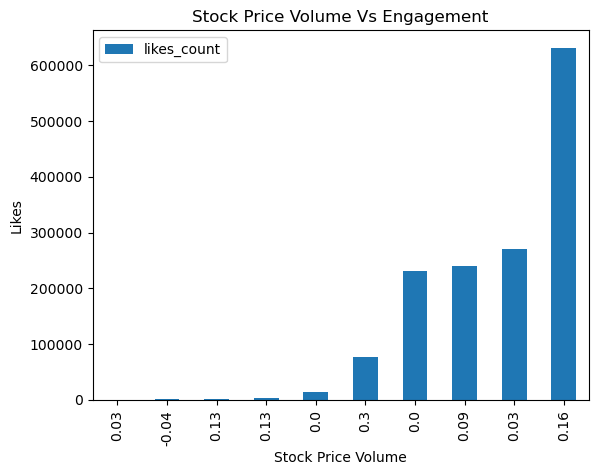

In [109]:
vol_stocks = vol_stocks.dropna(subset=['volume_correlation'])
#plot price volume vs sentiment
vol_stocks = vol_stocks.sort_values(by="likes_count")
vol_stocks.plot(x="volume_correlation", y="likes_count", kind = "bar")
plt.xlabel('Stock Price Volume')
plt.ylabel('Likes')
plt.title('Stock Price Volume Vs Engagement')
plt.show() 

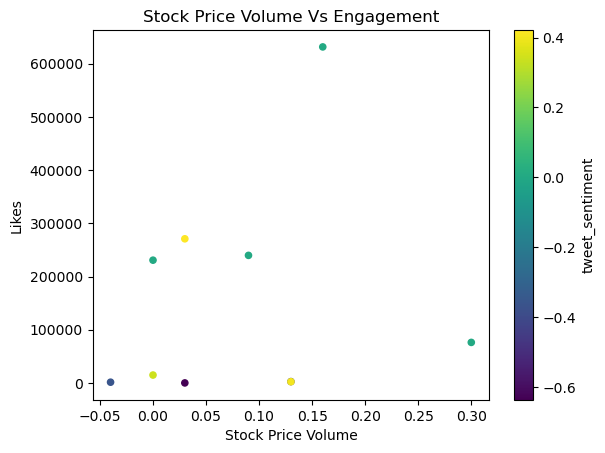

In [130]:
scatter = vol_stocks.plot.scatter(x='volume_correlation',
                    y='likes_count',
                    c = 'tweet_sentiment',
                    colormap='viridis')
plt.xlabel('Stock Price Volume')
plt.ylabel('Likes')
plt.title('Stock Price Volume Vs Engagement')
plt.show() 

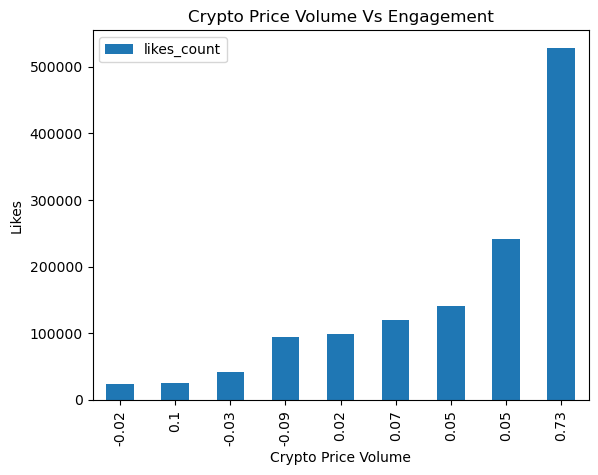

In [110]:
vol_crypto = vol_crypto.dropna(subset=['volume_correlation'])
#plot price volume vs sentiment
vol_crypto = vol_crypto.sort_values(by="likes_count")
vol_crypto.plot(x="volume_correlation", y="likes_count", kind = "bar")
plt.xlabel('Crypto Price Volume')
plt.ylabel('Likes')
plt.title('Crypto Price Volume Vs Engagement')
plt.show() 

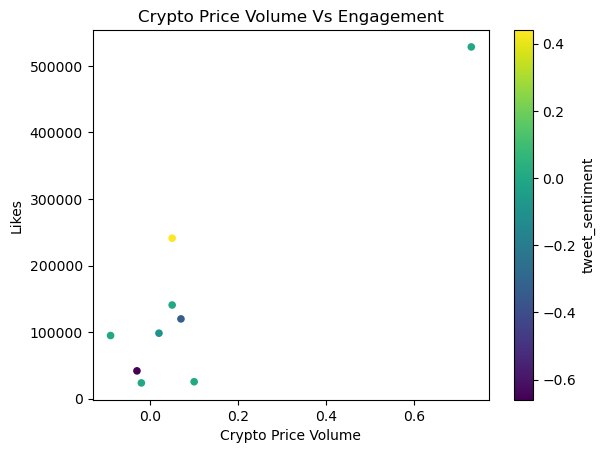

In [129]:
scatter = vol_crypto.plot.scatter(x='volume_correlation',
                    y='likes_count',
                    c = 'tweet_sentiment',
                    colormap='viridis')
plt.xlabel('Crypto Price Volume')
plt.ylabel('Likes')
plt.title('Crypto Price Volume Vs Engagement')
plt.show() 

In [98]:
id = [1408246196603346947, 1340573003579617280
,1215526980449255424,
1340588909974200321,
1054520588734058496,
1386821144037236737,
1420529868404518913,
1461942451053252612,
270972990756364288,
1421203369058787332,
1421152540394143746,
1354174279894642703,
1198751258384818176,
1055585815718322178,
1055882299756109824,
1055993647995412481,
1162061693809094657,
1498858611241635843]
price = [-0.02,
0.04,
0.02,
0.04,
0.00,
0.01,
0.03,
0.01,
0.01,
0.00,
0.00,
0.45,
-0.01,
0.02,
0.02,
0.02,
-0.01,
0.01,]
for i in range(len(id)):
        row = infl_tweets_df['id'] == id[i]
        infl_tweets_df.loc[row, 'price_correlation'] = price[i]

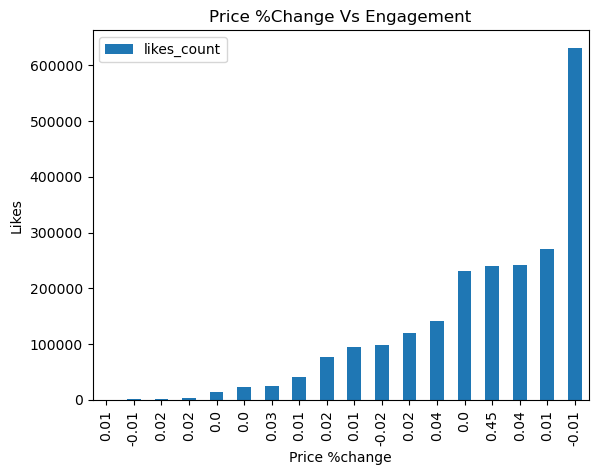

In [100]:
price_df = infl_tweets_df.dropna(subset=['price_correlation'])
#plot price volume vs sentiment
price_df = price_df.sort_values(by="likes_count")
price_df.plot(x="price_correlation", y="likes_count", kind = "bar")
plt.xlabel('Price %change')
plt.ylabel('Likes')
plt.title('Price %Change Vs Engagement')
plt.show() 

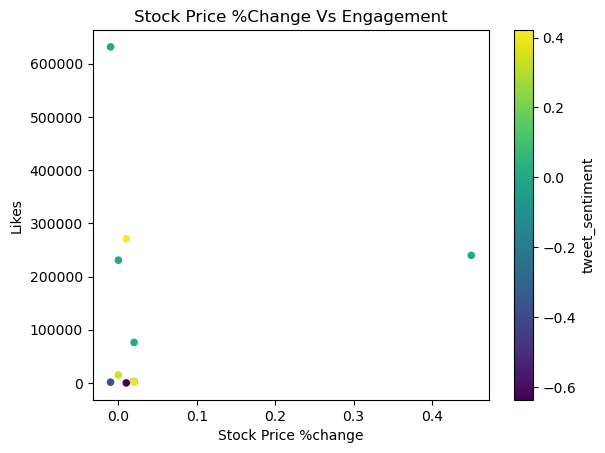

In [128]:
scatter = vol_stocks.plot.scatter(x='price_correlation',
                    y='likes_count',
                    c = 'tweet_sentiment',
                    colormap='viridis')
plt.xlabel('Stock Price %change')
plt.ylabel('Likes')
plt.title('Stock Price %Change Vs Engagement')
plt.show() 

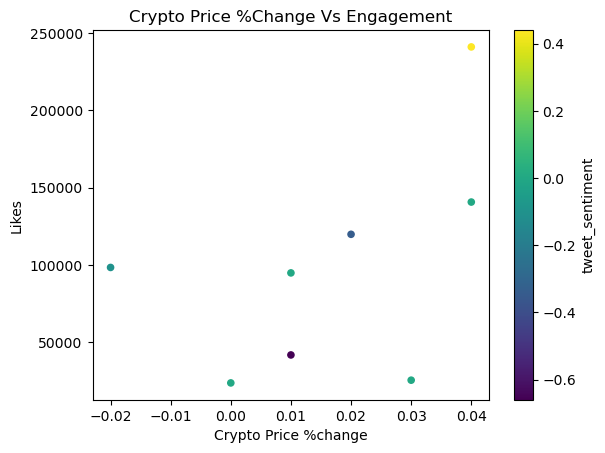

In [127]:
scatter = vol_crypto.plot.scatter(x='price_correlation',
                    y='likes_count',
                    c = 'tweet_sentiment',
                    colormap='viridis')
plt.xlabel('Crypto Price %change')
plt.ylabel('Likes')
plt.title('Crypto Price %Change Vs Engagement')
plt.show() 